# Supervised Learning of Non-Government Organizations Agricultural Activities 

## Table of Contents 

1. Introduction 
2. Data Acquisition  
3. Data Cleaning 
4. Exploratory Analysis 
   - 4.1 Participant Land 
   - 4.2 Applied Technology 
5. Model Creation and Fine Tuning
    - 5.1 OLS/LRM Modeling 
    - 5.2 Decision Tree Modeling
6. Testing the Model
7. Summary
    - 7.1 Practical Uses
    - 7.2 Areas of Improvements

## 1. Introduction

In early 1961 John F. Kennedy founded an organization geared towards humanitarium work, and the increased assistance of individuals in less than forgiving environments/conditions. With the motto "From the American People", USAID was founded and positioned to help developing countries globally. The work tasked by USAID, via the State Department, was in various fields that included Agriculture, Education, Trafficking, Health, etc. Various Non-Government Organization were founded to help address the level of committment needed. However with the evolution of technology, accessbility, and data aggregation, the efficacy of some NGO intervention needed to be supported quantitatively. 

This capstone will try to address a very specific agricultural intervention of one NGO in Guinea West Africa by using supervised data, that spans 5 different cities, collected from 2016 until 2019, +1500 participant dissagregates.  This data set includes information based on program participants adoption of a newly introduced agricultural tool/technique by said NGO. The question this capstone attempts to address: 

- What are the contributing variables that influence project participants to apply/utilize a agricultural tool or technique introduced by an NGO? 

In [172]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import scipy.stats as stat
import seaborn as sns 
import pydotplus 
import graphviz
import statsmodels.api as sm 

from sklearn import linear_model as linModel
from sklearn import metrics as metrics
from scipy.stats import bartlett, levene
from sklearn import tree
from IPython.display import Image
from statsmodels.tsa.stattools import acf 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score

## 2. Data Acquistion 

In [2]:
# Creating two different dataframes for the same file to do a comparison of ommitted missing data
# versus a file with partial data 

technology_df = pd.read_csv('Technologies et Pratiques de Gestion.csv', header = 0)
copy_tech_df = pd.read_csv('Technologies et Pratiques de Gestion.csv', header = 0)

## 3. Data Cleaning 

In [3]:
technology_df.head()

,KeyValue,Date,DernierJourDuTrimestre,Activite,Localisation,NomDeTechnologie,TypeDeTechnologie,PhaseDeTechnologie,TypeDeRecipiendaire,Superficie,...,NombredAnimaux,CodeDeMenage,NomPrenomdAgriculteur,Sexe,Age,Contact,TypeDeMenage,NouveauContinue,TechnologieAppliquee,DonneesNettoyees
0,2075,29 Mar 2018,31 Mar 2018,SMARTE,Bureau de Faranah (Exemple de localisation à...,Pilon amélioré,Gestion de l'irrigation et de l'eau (Irrigatio...,Disponible a l'utilisation (Made available for...,Producteurs (Producers),0.0000,...,0.0,GN-F-3-3.3-SC/1973/00655,Soba Condé,Femme (Female),Age 36+,0.0,F&H (M&F),Continue (Continuing),NaN,False
1,2076,26 Mar 2018,31 Mar 2018,SMARTE,Bureau de Faranah (Exemple de localisation à...,Technique mobipompe,Gestion de l'irrigation et de l'eau (Irrigatio...,Disponible a l'utilisation (Made available for...,Producteurs (Producers),0.0225,...,0.0,GN-F -3-3-3.MK/1976/00528,Monique Komano,Femme (Female),Age 36+,0.0,F&H (M&F),Continue (Continuing),NaN,False
2,2077,26 Mar 2018,31 Mar 2018,SMARTE,Bureau de Faranah (Exemple de localisation à...,Technique mobipompe,Gestion de l'irrigation et de l'eau (Irrigatio...,Disponible a l'utilisation (Made available for...,Producteurs (Producers),0.0688,...,0.0,GN-F -3-3-3.MK/1960/00472,Marie Kamano,Femme (Female),Age 36+,0.0,F&H (M&F),Continue (Continuing),NaN,False
3,2078,26 Mar 2018,31 Mar 2018,SMARTE,Bureau de Faranah (Exemple de localisation à...,Technique mobipompe,Gestion de l'irrigation et de l'eau (Irrigatio...,Disponible a l'utilisation (Made available for...,Producteurs (Producers),0.0421,...,0.0,GN-F -3-3-3.AK/1988/00500,Alis Komano,Femme (Female),Age 36+,0.0,F&H (M&F),Continue (Continuing),NaN,False
4,2079,26 Mar 2018,31 Mar 2018,SMARTE,Bureau de Faranah (Exemple de localisation à...,Technique mobipompe,Gestion de l'irrigation et de l'eau (Irrigatio...,Disponible a l'utilisation (Made available for...,Producteurs (Producers),0.0311,...,0.0,GN-F -3-3-3.FAM/1972/00532,Finda Angeline Millimono,Femme (Female),Age 36+,0.0,F&H (M&F),Continue (Continuing),NaN,False


In [4]:
technology_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 22 columns):
KeyValue                  3967 non-null int64
Date                      3967 non-null object
DernierJourDuTrimestre    3129 non-null object
Activite                  3834 non-null object
Localisation              3967 non-null object
NomDeTechnologie          3886 non-null object
TypeDeTechnologie         3945 non-null object
PhaseDeTechnologie        3964 non-null object
TypeDeRecipiendaire       3929 non-null object
Superficie                3967 non-null float64
Speculation               3920 non-null object
SousSpeculation           3915 non-null object
NombredAnimaux            3967 non-null float64
CodeDeMenage              3924 non-null object
NomPrenomdAgriculteur     3958 non-null object
Sexe                      3966 non-null object
Age                       3851 non-null object
Contact                   3289 non-null float64
TypeDeMenage              2684 non-null objec

In [43]:
#Getting the percentage of missing data in columns by highest 
total_missing = technology_df.isnull().sum().sort_values(ascending=False)
percent_missing = (technology_df.isnull().sum()/technology_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

,Total,Percent
new_participant,0,0.0
NombredAnimaux,0,0.0
Conjoint (Joint),0,0.0
DonneesNettoyees,0,0.0
TechnologieAppliquee,0,0.0
NouveauContinue,0,0.0
TypeDeMenage,0,0.0
Contact,0,0.0
Age,0,0.0
Sexe,0,0.0


In [6]:
technology_df.corr()

,KeyValue,Superficie,NombredAnimaux,Contact
KeyValue,1.000000,0.189126,-0.010704,0.653347
Superficie,0.189126,1.000000,0.070228,0.168097
NombredAnimaux,-0.010704,0.070228,1.000000,0.085564
Contact,0.653347,0.168097,0.085564,1.000000


In [7]:
# Cleaning the data set and populating the copy data frame with NA  
copy_tech_df.TechnologieAppliquee = copy_tech_df.TechnologieAppliquee.fillna('NA')
copy_tech_df.Activite = copy_tech_df.Activite.fillna('NA')
copy_tech_df.NomDeTechnologie  =  copy_tech_df.NomDeTechnologie.fillna('NA')
copy_tech_df.NouveauContinue = copy_tech_df.NouveauContinue.fillna('NA')
copy_tech_df.TypeDeRecipiendaire = copy_tech_df.TypeDeRecipiendaire.fillna('NA')
copy_tech_df.TypeDeTechnologie = copy_tech_df.TypeDeTechnologie.fillna('NA')
copy_tech_df.TypeDeMenage = copy_tech_df.TypeDeMenage.fillna('NA')
copy_tech_df.NomDeTechnologie = copy_tech_df.NomDeTechnologie.fillna('NA')
copy_tech_df.SousSpeculation = copy_tech_df.SousSpeculation.fillna('NA')
copy_tech_df.Speculation = copy_tech_df.Speculation.fillna('NA')
copy_tech_df.TypeDeRecipiendaire = copy_tech_df.TypeDeRecipiendaire.fillna('NA')
copy_tech_df.TypeDeTechnologie = copy_tech_df.TypeDeTechnologie.fillna('NA')
copy_tech_df.PhaseDeTechnologie = copy_tech_df.PhaseDeTechnologie.fillna('NA')


In [8]:
#Get the percentage of missing data in columns by highest for the COPY DATAFRAME 

total_missing = copy_tech_df.isna().sum().sort_values(ascending=False)
percent_missing = (copy_tech_df.isna().sum()/copy_tech_df.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

,Total,Percent
DernierJourDuTrimestre,838,0.211243
Contact,678,0.170910
Age,116,0.029241
CodeDeMenage,43,0.010839
NomPrenomdAgriculteur,9,0.002269
DonneesNettoyees,1,0.000252
Sexe,1,0.000252
PhaseDeTechnologie,0,0.000000
Date,0,0.000000
Activite,0,0.000000


In [12]:
#Dropping the erroneous data in the original dataframe 
technology_df = technology_df.dropna()

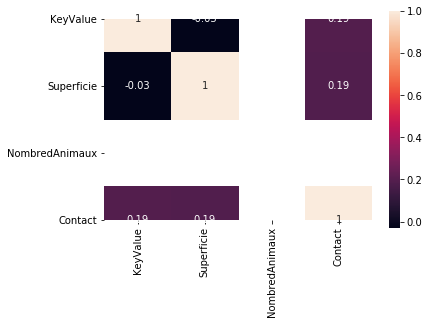

In [13]:
#Correlation Heatmap 
plt.figure()
sns.heatmap(technology_df.corr(), square =True, annot = True)

In [15]:
#Setting the type of each category/column 
technology_df.NombredAnimaux = technology_df.NombredAnimaux.astype(np.int)
technology_df.TypeDeRecipiendaire = technology_df.TypeDeRecipiendaire.astype(np.str)
technology_df.TechnologieAppliquee = technology_df.TechnologieAppliquee.astype(np.bool)

#Changing boolean columens to dummy and/or categories 
technology_df ['older_36'] = pd.get_dummies(technology_df.Age, drop_first=True)
technology_df ['tech_applied'] = pd.get_dummies(technology_df.TechnologieAppliquee, drop_first=True)
technology_df ['new_participant'] = pd.get_dummies(technology_df.NouveauContinue, drop_first = True) 


In [16]:
technology_df.corr()

,KeyValue,Superficie,NombredAnimaux,Contact,TechnologieAppliquee,Conjoint (Joint),Femme (Female),Homme (Male),Prestataires de service (Service Providers),Processors,...,Boeuf (Beef),Chèvre (Goat),Gombo (Ocra),Irrigation (Irrigation),Mouton (Sheep),Pluies (Rain-fed),Poulet (Chicken),older_36,tech_applied,new_participant
KeyValue,1.000000,-0.030490,NaN,0.194892,0.248474,-0.191980,0.070117,-0.021675,0.158817,0.064009,...,0.045273,0.044859,0.004004,-0.016746,0.044756,-0.117599,0.045169,0.745908,0.248474,0.074707
Superficie,-0.030490,1.000000,NaN,0.189309,0.222114,0.305544,-0.035315,-0.040973,-0.018086,-0.003108,...,-0.001257,-0.002197,-0.028796,-0.037789,-0.002197,0.042457,-0.002197,-0.026479,0.222114,0.177758
NombredAnimaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact,0.194892,0.189309,NaN,1.000000,0.855566,-0.019759,-0.031635,0.036208,0.004882,0.212538,...,0.160849,0.160770,-0.071933,-0.232839,0.149755,-0.035805,0.150366,-0.053113,0.855566,0.474311
TechnologieAppliquee,0.248474,0.222114,NaN,0.855566,1.000000,-0.016919,-0.029835,0.033722,-0.029495,0.251640,...,0.177880,0.177880,-0.055793,-0.199379,0.177880,-0.030659,0.177880,-0.044424,1.000000,0.391757
Conjoint (Joint),-0.191980,0.305544,NaN,-0.019759,-0.016919,1.000000,-0.082571,-0.166758,-0.024775,-0.004258,...,-0.003010,-0.003010,-0.013632,0.027513,-0.003010,0.000502,-0.003010,-0.063108,-0.016919,-0.027073
Femme (Female),0.070117,-0.035315,NaN,-0.031635,-0.029835,-0.082571,1.000000,-0.968862,-0.020992,-0.024737,...,-0.017486,-0.017486,0.006346,0.112848,-0.017486,-0.143032,-0.017486,0.037010,-0.029835,-0.069082
Homme (Male),-0.021675,-0.040973,NaN,0.036208,0.033722,-0.166758,-0.968862,1.000000,0.026924,0.025532,...,0.018048,0.018048,-0.002892,-0.118484,0.018048,0.141388,0.018048,-0.020938,0.033722,0.075074
Prestataires de service (Service Providers),0.158817,-0.018086,NaN,0.004882,-0.029495,-0.024775,-0.020992,0.026924,1.000000,-0.007422,...,-0.005247,-0.005247,0.083991,-0.061855,-0.005247,-0.013912,-0.005247,0.113007,-0.029495,-0.047196
Processors,0.064009,-0.003108,NaN,0.212538,0.251640,-0.004258,-0.024737,0.025532,-0.007422,1.000000,...,-0.000902,-0.000902,-0.019516,-0.050172,-0.000902,-0.007715,-0.000902,0.011892,0.251640,0.074576


In [47]:
#Descriptive Analytics of the dataframe with no missing data
technology_df.describe()

,KeyValue,Superficie,NombredAnimaux,Contact,Conjoint (Joint),Femme (Female),Homme (Male),Prestataires de service (Service Providers),Processors,Producteurs (Producers),...,Boeuf (Beef),Chèvre (Goat),Gombo (Ocra),Irrigation (Irrigation),Mouton (Sheep),Pluies (Rain-fed),Poulet (Chicken),older_36,tech_applied,new_participant
count,1570.000000,1570.000000,1570.0,1.570000e+03,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,...,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000
mean,1284.324841,0.009350,0.0,1.685596e+07,0.014013,0.324204,0.661783,0.041401,0.001274,0.957325,...,0.000637,0.000637,0.229936,0.663694,0.000637,0.044586,0.000637,0.342038,0.019745,0.049045
std,488.466381,0.107468,0.0,1.017310e+08,0.117581,0.468226,0.473253,0.199280,0.035680,0.202188,...,0.025238,0.025238,0.420926,0.472595,0.025238,0.206459,0.025238,0.474543,0.139168,0.216030
min,290.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,865.250000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1261.500000,0.000000,0.0,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1703.750000,0.000000,0.0,0.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3877.000000,2.500000,0.0,6.661162e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Exploratory Analysis

After the data has been cleaned, this portion of the capstone will explore the data set through visual graphics. From the data cleaning process, several things were learned, including the participant disaggregations, types of different agricultural techniques and tools, as well as categorical information related to the type of participant.

There are several inferences that were made prior to the aquistion of this data. As stated in the introduction, USAID set contractual obligations for NGO's to meet specific metrics. Those metrics included targets that were set by the project; with assumptions made regarding the applicability of the projects intervention. Several of those inferences included: 
- There is a correlation between agricultural farmers that own land for vegetation and those that cultivate land primarily for livestock 
- The selection criteria for project participants (training experience, processor vs producer, age, etc) are necessary for a participant to apply an agricultural technique/technology 
- The projects intervention increases the adoption of new agricultural practices and techniques 
- The younger generation has a higher adoption of technology in comparison to the older generation 


### 4.1 Participant Land

This section explores the different facets of land division and disaggregation among the various data points. In order to validate or refute the inferences above, it is pivotal to understand how, and if, land ownership plays a role in the application of agricultural techniques and practices. Below, the following questions are addressed: 

- How many of the participants have land, and what is the average number of hecates of land owned? 
- Is land being cultivated for livestock or vegetation? If vegetation, then what is the primary vegetable? 
- What is the number of participants that are currently applying an new/improved agricultural technique or technology without the project intervention? 
- Land ownership is divided amongst the project participant based on what factors? Household? Age? Sex? 
- Which participant type owns the highest amount of land and would benefit from an introduction of new/improved agricultural practices? 

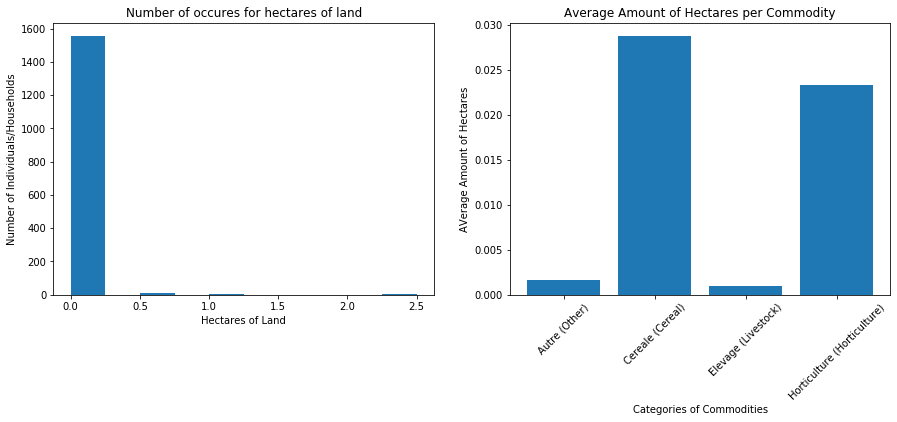

In [76]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(technology_df.Superficie)
plt.xlabel('Hectares of Land')
plt.ylabel('Number of Individuals/Households')
plt.title('Number of occures for hectares of land')

plt.subplot(1,2,2)
plt.bar(technology_df.groupby('Speculation')['Superficie'].mean().index, technology_df.groupby('Speculation')['Superficie'].mean())
plt.xlabel('Categories of Commodities')
plt.xticks(rotation=45)
plt.ylabel('AVerage Amount of Hectares')
plt.title('Average Amount of Hectares per Commodity')


plt.show()

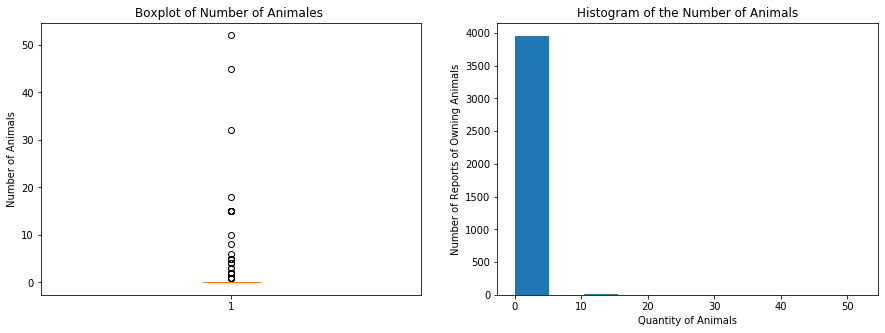

In [21]:
# Graphical Representation of data related to Livestock 

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(copy_tech_df ['NombredAnimaux'])
plt.ylabel('Number of Animals')
plt.title('Boxplot of Number of Animales ')

plt.subplot(1,2,2)
plt.hist(copy_tech_df ['NombredAnimaux'])
plt.xlabel('Quantity of Animals')
plt.ylabel('Number of Reports of Owning Animals')
plt.title('Histogram of the Number of Animals')

plt.show()

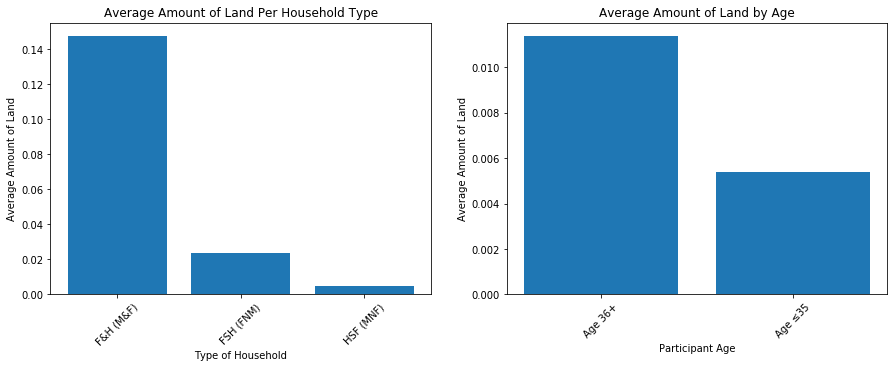

In [70]:
plt.figure(figsize =(15,5))

plt.subplot(1,2,1)
plt.bar(technology_df.groupby(technology_df.TypeDeMenage)['Superficie'].mean().index, technology_df.groupby(technology_df.TypeDeMenage) ['Superficie'].mean())
plt.xlabel('Type of Household')
plt.xticks(rotation=45)
plt.ylabel('Average Amount of Land')
plt.title('Average Amount of Land Per Household Type')

plt.subplot(1,2,2)
plt.bar(technology_df.groupby(technology_df.Age)['Superficie'].mean().index, technology_df.groupby(technology_df.Age) ['Superficie'].mean())
plt.xlabel('Participant Age')
plt.xticks(rotation=45)
plt.ylabel('Average Amount of Land')
plt.title('Average Amount of Land by Age')


plt.show()

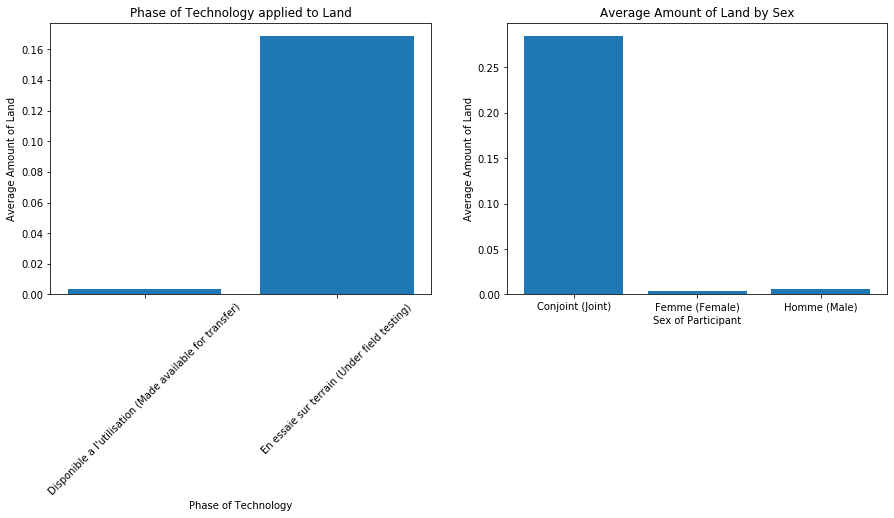

In [73]:
plt.figure(figsize =(15,5))

plt.subplot(1,2,1)
plt.bar(technology_df.groupby(technology_df.PhaseDeTechnologie)['Superficie'].mean().index, technology_df.groupby(technology_df.PhaseDeTechnologie) ['Superficie'].mean())
plt.xlabel('Phase of Technology')
plt.xticks(rotation=45)
plt.ylabel('Average Amount of Land')
plt.title('Phase of Technology Applied to Land')

plt.subplot(1,2,2)
plt.bar(technology_df.groupby(technology_df.Sexe)['Superficie'].mean().index, technology_df.groupby(technology_df.Sexe) ['Superficie'].mean())
plt.xlabel('Sex of Participant')
plt.ylabel('Average Amount of Land')
plt.title('Average Amount of Land by Sex')

plt.show()

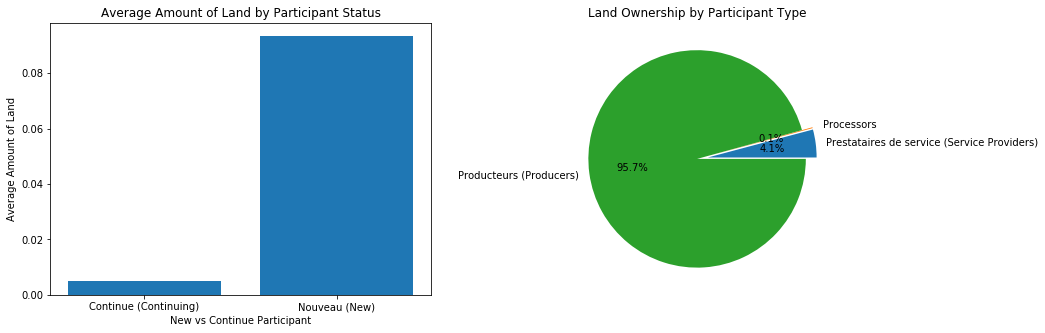

In [99]:
plt.figure(figsize =(15,5))

plt.subplot(1,2,1)
plt.bar(technology_df.groupby(technology_df.NouveauContinue)['Superficie'].mean().index, technology_df.groupby(technology_df.NouveauContinue) ['Superficie'].mean())
plt.xlabel('New vs Continue Participant')
plt.ylabel('Average Amount of Land')
plt.title('Average Amount of Land by Participant Status')

plt.subplot(1,2,2)
plt.pie(technology_df.groupby(technology_df.TypeDeRecipiendaire) ['Superficie'].count(), explode=(.1,.1,0), autopct='%1.1f%%', labels=technology_df.TypeDeRecipiendaire.unique())
plt.title('Land Ownership by Participant Type')

plt.show()

The graphs above were able to provie a lot of insight into the hectares of land, disaggregations, and overall data landscape. Some of this insight includes 95.7% of Producers own, on average, less than .5 hectares of land, however, the majority of project participants utilize their land for farming versus livestock. Less than .0005 utilize their land for livestock, which substanstiates that new agricultural technique and tools would be applicable to this group of individuals.

Taking the cultural environment into account can create a deeper understanding of the data. Primarily the two graphs, "Average Amout of Land Per Household", and "Average Amount of Land By Age". This data was disaggregated for household by M&F (male and female), HSF (male no female), FSN (female no male), and disaggregated for age by older than 35 and younger than 35. The reason the age threshold is set so high is due to cultural reasons. The age of maturity is set at 35 in Guines versus, 21 in the United States. Taking this into account, the aggregated information is in direct contrast with the preconcieved notion that the younger generation would own a larger quantity of land in comparison to the older generation. Also, female led household had more land, .02 then male led household which was less than .02. But the reverse is true for single males and females; single men had more land, .01 hectares more land than single women did, of .02. 

### 4.1 Technology Application 

The Participant Land section provided context to the project participants; including the total number of individuals, average number of hectares per individual, by sex, speciality, commodity, etc. This section will delve into understanding the different aspects of participants that applied an agricultural technology and or tool. This data here will also influence the feature selection process for the applied technology model. 

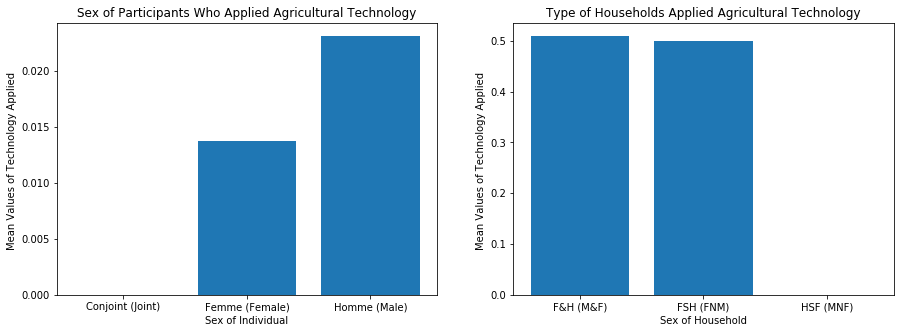

In [101]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
# Graphical Representatio of the data 
plt.bar(technology_df.groupby(technology_df.Sexe)['TechnologieAppliquee'].mean().index, technology_df.groupby(technology_df.Sexe) ['TechnologieAppliquee'].mean())
plt.xlabel('Sex of Individual')
plt.ylabel('Mean Values of Technology Applied ')
plt.title('Sex of Participants Who Applied Agricultural Technology')

plt.subplot(1,2,2)
# Graphical Representatio of the data 
plt.bar(technology_df.groupby(technology_df.TypeDeMenage)['TechnologieAppliquee'].mean().index, technology_df.groupby(technology_df.TypeDeMenage) ['TechnologieAppliquee'].mean())
plt.xlabel('Sex of Household')
plt.ylabel('Mean Values of Technology Applied ')
plt.title('Type of Households Applied Agricultural Technology')

plt.show()

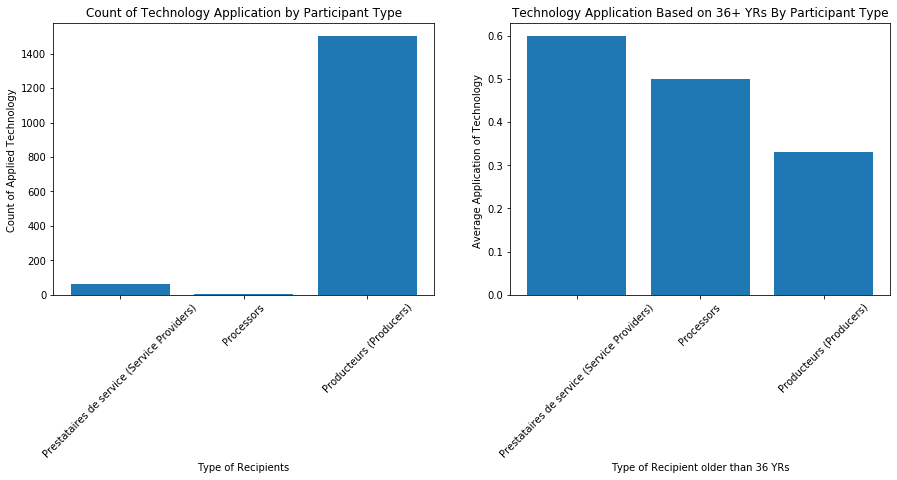

In [27]:
# Graphical Representatio of the data 
plt.figure(figsize =(15,5))

plt.subplot(1,2,1)
plt.bar(technology_df.groupby('TypeDeRecipiendaire')['TechnologieAppliquee'].mean().index, technology_df.groupby('TypeDeRecipiendaire') ['TechnologieAppliquee'].count())
plt.xlabel('Type of Recipients')
plt.xticks(rotation=45)
plt.ylabel('Count of Applied Technology ')
plt.title('Count of Technology Application by Participant Type')

plt.subplot(1,2,2)
plt.bar(technology_df.groupby('TypeDeRecipiendaire')['older_36'].mean().index, technology_df.groupby('TypeDeRecipiendaire') ['older_36'].mean())
plt.xlabel('Type of Recipient older than 36 YRs')
plt.xticks(rotation=45)
plt.ylabel('Average Application of Technology ')
plt.title('Technology Application Based on 36+ YRs By Participant Type')

plt.show()

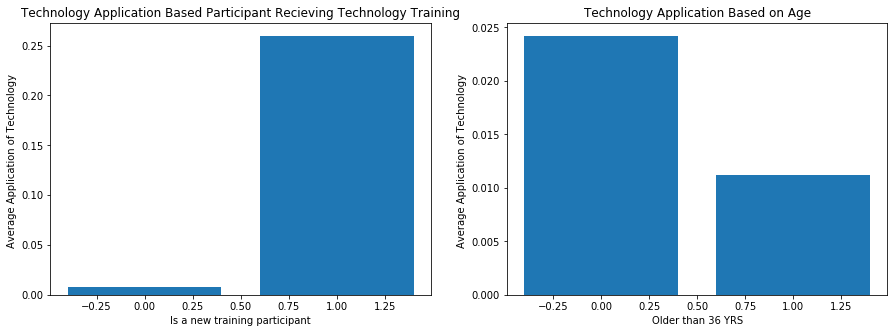

In [28]:
# Graphical Representatio of the data 

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.bar(technology_df.groupby('new_participant')['TechnologieAppliquee'].mean().index, technology_df.groupby('new_participant') ['TechnologieAppliquee'].mean())
plt.xlabel('Is a new training participant')
plt.ylabel('Average Application of Technology ')
plt.title('Technology Application Based Participant Recieving Technology Training')


plt.subplot(1,2,2)
plt.bar(technology_df.groupby('older_36')['TechnologieAppliquee'].mean().index, technology_df.groupby('older_36') ['TechnologieAppliquee'].mean())
plt.xlabel('Older than 36 YRS')
plt.ylabel('Average Application of Technology ')
plt.title('Technology Application Based on Age')


plt.show()

Overall understanding of the data set increases when viewing this section; specifically about the households applying technologies, age of participants, speciality of those individuals, and gender. For example, the graph "Type of Households Applied Agricultural Technology" show's the men led households less likely to apply new agricultural tools and techniques. Coupled with the graph "Average Amount of Hectares By Household", show that male led households have the lowest amount of agricultural land. The inverse becomes true when evaluating individuals over the age of 36 and/or singles. Based on the data provided, single males are more likely to apply an agricultural technology, even though they had less land than their counter part. The data also shows that people under the age of 36 will apply an agricultural practice/tool to more land than an individual over 36.

After exploring the data, specific variables appeared to be highly correlated to the application and adoption of a technological tool. Some of the variables included: 
- Participants older than 36 
- Participants who are a producer or service provider 
- Female led household
- Participants specializing in production and not livestock 


## 5. Model Creation and Fine Tuning 

Statistical Analysis is a necessary field that is being interjected into mean different industries, international developement not being any different. Within international development, government funding for projects have been decreasing. Thus forcing funders/donors to search for proven methods, that can be quantified and statistically proven. 

When building out a predictive model the target and explanatory variables have to be established. The models target is wether or not an individual will adopt a technology that is introduced into an environment. Within the data set, a dummy variable was created to represent if an individual had applied a technology. Originally, the applied technology existed as a boolen variable, however converting it to a dummy variable allows us to analysis potential correlation. Assessing the first iteration of variables was dependant on the EDA stage; which highlighted the following variables: 
- Participants older than 36 
- Participants who are a producer or service provider 
- Female led household
- Participants specializing in production and not livestock

Oridinary Least Squares Model, Linear Regression Model, and Decision Tree are being used to asses the predictive model contrived from the exploratory data analysis stage. The primary reason these models are being tested is because the data set is working on the assumoption of linearity between the variables. 

### 5.1 OLS and LRM Modeling

In [103]:
Y = technology_df ['tech_applied']
X = technology_df [['older_36', 'Producteurs (Producers)', 'Prestataires de service (Service Providers)', 'new_participant', 'Superficie', 'Femme (Female)', 'Production (Production)', 'F&H (M&F)']]

X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()

c:\users\samuel.sesay\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tech_applied   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     155.4
Date:                Wed, 25 Mar 2020   Prob (F-statistic):          1.98e-192
Time:                        20:51:08   Log-Likelihood:                 1328.7
No. Observations:                1570   AIC:                            -2639.
Df Residuals:                    1561   BIC:                            -2591.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.5336      0.075      7.078      0.000       0.386       0.681
older_36                                        0.0008      0.006      0.143      0.886      -0.010       0.012
Producteurs (Producers)                        -0.5338      0.075     -7.083      0.000      -0.682      -0.386
Prestataires de service (Service Providers)    -0.5574      0.076     -7.303      0.000      -0.707      -0.408
new_participant                                 0.0384      0.015      2.638      0.008       0.010       0.067
Superficie                                      0.1004      0.025      3.976      0.000       0.051       0.150
Femme (Female)                                  0.0053      0.006      0.940      0.347      -0.006       0.016
Production (Production)                         0.0028      0.006      0.490      0.624      -0.008       0.014
F&H (M&F)                                       0.4468      0.018     24.341      0.000       0.411       0.483
==============================================================================
Omnibus:                     1171.393   Durbin-Watson:                   0.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98061.551
Skew:                           2.784   Prob(JB):                         0.00
Kurtosis:                      41.315   Cond. No.                         75.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The first model appears to be work on an average level, but isn't entirely the best fit. By reviewing the Adjusted R-squared, approximately 44% of the data can be explained by the features used with in the model. The small p value for a large F value alludes to the rejection of the null hypothesis and that the model predicts values better than the mean value (i.e. featureless model). The negative AIC indicates less information loss than a positive AIC, supporting the F statistics of a better model. However, when evaluating the coefficients for each variable, the p value for the t-Test is greater for the following variables: 
- Participants older than 36 (coefficient: .008)
- Female (coefficient: .0053)
- Working in the production sector (coefficient: .0028)

Thus saying that the coefficients are statistically irrelevant. Respectively this appears to be true seeing how the largest coefficient among the three variables is Female (.0053) and would require 189 women, without the influence of other variable coefficients, to output a correct target. This predictive model is skewed 2.784 with a high Jarque-Bera probability. This lets us know that heteroscadisticity exists within the data set we are using. Based on the information provided, a second model will be tested against this first model that omit variables with negligble coefficients but considers other featuers with higher correlational values to applied technologies. 

In [110]:
Y_two = technology_df ['tech_applied']
X_two = technology_df [['Producteurs (Producers)', 'Prestataires de service (Service Providers)', 'new_participant', 'Superficie', 'F&H (M&F)', 'Fertilité et conservation de la terre (Soil Fertitlity and Conservation)', 'Ananas (Pineapples)']]

lrm = linModel.LinearRegression()
lrm.fit(X,Y)

X_two = sm.add_constant(X_two)

results_two = sm.OLS(Y_two,X_two).fit()
results_two.summary()

c:\users\samuel.sesay\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tech_applied   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     347.7
Date:                Wed, 25 Mar 2020   Prob (F-statistic):          3.95e-313
Time:                        22:17:30   Log-Likelihood:                 1606.2
No. Observations:                1570   AIC:                            -3196.
Df Residuals:                    1562   BIC:                            -3154.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
const                                                                        0.4359      0.064      6.862      0.000       0.311       0.560
Producteurs (Producers)                                                     -0.4407      0.063     -6.944      0.000      -0.565      -0.316
Prestataires de service (Service Providers)                                 -0.4530      0.064     -7.042      0.000      -0.579      -0.327
new_participant                                                              0.0285      0.012      2.339      0.019       0.005       0.052
Superficie                                                                   0.0461      0.021      2.167      0.030       0.004       0.088
F&H (M&F)                                                                    0.3710      0.016     23.622      0.000       0.340       0.402
Fertilité et conservation de la terre (Soil Fertitlity and Conservation)     0.6894      0.040     17.135      0.000       0.610       0.768
Ananas (Pineapples)                                                          0.1789      0.011     15.970      0.000       0.157       0.201
==============================================================================
Omnibus:                      793.891   Durbin-Watson:                   0.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51598.509
Skew:                           1.532   Prob(JB):                         0.00
Kurtosis:                      30.917   Cond. No.                         69.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The second model appears to perform better than the first model! Based on eliminating the features with negliglble coefficients and adding variables with high correlation value to the target; the models performance increased. The Adjusted R Squared states that close to 61% of the data can be explained by the selected features. This is also supported by the low p value for the F test, indicating that this new model is statistically more relevant than a featureless model. The models skew and Jarque-Bera score have decreased to 1.5 and 51598 respectively; indicating the level of heteroscadisticity has decreased. 

The specific changes to the new predictive model are the addition of a specific technology, as well as a specialized commodity, i.e. Pineapples. The inclusion of Soil Fertility and Conservation technology with the inclusion of pineapple specialist increased the probability that a technology will be adopted.

### 5.2 Decision Tree Model

The section will evaluate using a decision tree model to view the utilization of a technology by a participant. 

In [131]:
decision_tech_df = pd.DataFrame()

#Hot coding the data for categorical data 
decision_tech_df ['older_36']  = technology_df.older_36
decision_tech_df ['tech_applied'] = technology_df.tech_applied
decision_tech_df ['new_participant'] = technology_df.new_participant

#nov_con_dummy = pd.get_dummies(pd.DataFrame([*technology_df.NouveauContinue], index = technology_df.NouveauContinue.index).stack()).any(level=0).astype(int)


![](Screenshot_34.jpg)

## 6. Testing the Model 

In [175]:
#Creating the training and test set of data and applying it to the first model 
X_train, X_test, y_train, y_test = train_test_split(X_two, Y_two, test_size = 0.2, random_state = 465)

# We fit an OLS model using statsmodels
results_train = sm.OLS(y_train, X_train).fit()

results_train.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tech_applied   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     261.6
Date:                Thu, 26 Mar 2020   Prob (F-statistic):          1.51e-239
Time:                        15:14:30   Log-Likelihood:                 1257.3
No. Observations:                1256   AIC:                            -2499.
Df Residuals:                    1248   BIC:                            -2458.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
const                                                                        0.4323      0.065      6.632      0.000       0.304       0.560
Producteurs (Producers)                                                     -0.4376      0.065     -6.722      0.000      -0.565      -0.310
Prestataires de service (Service Providers)                                 -0.4474      0.066     -6.754      0.000      -0.577      -0.317
new_participant                                                              0.0086      0.014      0.597      0.551      -0.020       0.037
Superficie                                                                   0.0763      0.022      3.399      0.001       0.032       0.120
F&H (M&F)                                                                    0.3914      0.018     22.360      0.000       0.357       0.426
Fertilité et conservation de la terre (Soil Fertitlity and Conservation)     0.5868      0.065      8.984      0.000       0.459       0.715
Ananas (Pineapples)                                                          0.1720      0.012     13.835      0.000       0.148       0.196
==============================================================================
Omnibus:                      505.219   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30670.350
Skew:                           1.028   Prob(JB):                         0.00
Kurtosis:                      27.121   Cond. No.                         62.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
metrics.mean_absolute_error(y_test, predictions)

0.02002479281593126

In [161]:
predictions = results_train.predict(X_test)
error = Y - predictions
bart_stats = bartlett (predictions, error)

print('Bartlett Results are: {}'.format(bart_stats))

Bartlett Results are: BartlettResult(statistic=32.71842157965119, pvalue=1.0652287056765209e-08)


In [155]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,predictions.round())))

Confusion Matrix : 
[[308   0]
 [  2   4]]


In [157]:
print('Accuracy Score : ' + str(accuracy_score(y_test,predictions.round())))
print('Precision Score : ' + str(precision_score(y_test,predictions.round())))

Accuracy Score : 0.9936305732484076
Precision Score : 1.0


The second model created was tested on a training and test set of data, with 20 percent of the data residing in the test set. The trained model performed compartively similar to the original model. According to the Adjusted R Squared test, 59.5% percent of the data was explained by the model, and statistically more releveant than a model without features (when evaluating the p statistic for the F value). Two notable differences is the trained model t-test p value for new participant rejects the null hypothesis, also the models skew has decreased to 1.028. The new participant variable's coefficent changed to .0086 with a p value of .551 indicating the coefficient is statistically irrelevant. The skew value diminishing may be a result of a smaller data set being utilizied, however the Mean Absolute Error test shows that there is differences between the mean tested and predicted values, albiet not exceptionally large. Though the MAE doesn't provide definite information regarding under/overfitting of the model, the size of the value indicates the model is not overfitting; the Bartlett test reinforces the concept of heteroscadisticty within the data. Coupled with the confusion matrix, speaks to the accuracy of the model.

## 7. Summary 

In conclusion a model was created that was able to explain 60% of the data, and possibly influence how Non Governmental Organizations completed specific tasks for targeted goals. Through several iterations of the data, the following features were statistically proven to influence an individual adoption of an agricultural tool/technology in Guinea: 
- If the participant is a producer of agriculteral goods or a service provider  
- If the participant recieved training on the agricultural tool/technique and has/had access to that tool/technique within a year  
- If the participant has land of their own   
- If the household is comprised of a minimum of two people, with a male and female occupant  
- If the technology being introduced is focused on Soil Fertility and Conservation 
- If participants work in the pineapple sector, or horticulture 

The model was able to explain close to 60% of the test data, with an accuracy of 90%. The Ordinary Least Squares model was the best model based on the accuracy results, confusion matrix, and adjusted R squared analysis, in accordance with the models features. There were several attempts to tune the model based on the Confusion Matrix, Mean Absolute Error of .020, and Bartlett Test.  

### 7.1 Practical Uses 
There are various practical uses for this model that include (but are not limited to): 
- Knwoledgebase/Library of Effective Implementations - NGOs can begin to build a library of interventions that statistically improved or changed behaviour pattern. The results do not prove causation, however strong correlations can help projects become more adaptable to shocks and changes  
-  Understanding Socio-Economic Behaviors - When evaluating the data, some of the information appeared conflicting when viewed with a Western perception; providing an opportunity to note the cultural implications through out the data 
- Receive Donor Funding for New Initiatives - In conjunction with creating a library of statistically supported techniques, NGO's can bid on proposal and support their bids with statistical analysis
- Influencing Privatization of Agricultural Tools/Techniques - due to congressional oversight, multiple NGO are beginning to coordinate with the private sector, who can leverage this information to focus agricultural sales to a specific and targeted group 
- Potential Modeling for Other Systems and Products - This model can poissibly be applied to the application of other agricultural products for different sectors  


### 7.2 Areas of Improvement 
There are several area's of improvement regarding the model; primarily increase the overall accuracy of the model. The Adjusted R-squared test only showed 60% of the data being explained by the models features; being able to tune the model to decrease the heterscadisticity, while increasing it's accuracy would be an area of improvement. Applying an A/B Hypothesis testing would also be ideal to understanding the underlying causes of agricultural techonology adoption.

Another area of improvement is the quality of data collected; 51% of the original data was omitted due to incomplete and missing classifications. The data collection methodology needs to be better understood, and improved upon to increase the quality of data acquired. This would possible open a wider discussion into additional follow up with participants, longer than the 3 years worth of data provided. The data was limited to only 2 rotations of training participants, which decreases the level of confidence within the data. 

Building upon the earlier point, the data set can be improved upon by leveraging additional data sources. The model approaches agricultural tool adoption in Guinea in a very global and generalized perspective. There is the potential of aplethora of factors that also influence the adoption of different technologies, such as the market price of the tool, value of certain commodities, investment capital of participants, etc, being discountedor underrepresented. A baseline survey that captured this information, paired with the applied technology data would have provided a more cohort picture with higher confidence in the models feature.  


# Thank You